## Model predicts the type of a pokemon based on its appearence
As input i will use the image of a pokemon. As output we will get a pokemon type

### Import Dependencies

In [4]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import sys
import numpy as np
from PIL import Image   

In [5]:
print(f'python: {sys.version[0:7]}')  # 3.10.12
print(tf.__version__)  # 2.13.0
print(np.__version__)  # 1.24.3

python: 3.10.12
2.13.0
1.24.3


### Load Data

we need to load 2 datasets
- pokemon types
- pokemon images

pokemon_types but as label

In [63]:
def pokemon_type_to_label(type):
    if type[0] == 'None':
        return None
    elif type[0] == 'Grass':
        return 0
    elif type[0] == 'Fire':
        return 1
    elif type[0] == 'Water':
        return 2
    elif type[0] == 'Electric':
        return 3
    elif type[0] == 'Ice':
        return 4
    elif type[0] == 'Fighting':
        return 5
    elif type[0] == 'Poison':
        return 6
    elif type[0] == 'Ground':
        return 7
    elif type[0] == 'Flying':
        return 8
    elif type[0] == 'Psychic':
        return 9
    elif type[0] == 'Bug':
        return 10
    elif type[0] == 'Rock':
        return 11
    elif type[0] == 'Ghost':
        return 12
    elif type[0] == 'Steel':
        return 13
    elif type[0] == 'Dragon':
        return 14
    elif type[0] == 'Dark':
        return 15
    elif type[0] == 'Fairy':
        return 16
    elif type[0] == 'Normal':
        return 17
    else:
        'ERROR'


types = ['Grass', 'Fire', 'Water', 'Electric', 'Ice', 'Fighting', 'Poison', 'Ground',
         'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Steel', 'Dragon', 'Dark', 'Fairy', 'Normal']

only primary types because that was easier

In [53]:
import csv

pokemon_primary_types = []
with open('./pokemon_data/pokemon_Type1.csv', newline='') as type1:
    type1_reader = csv.reader(type1, delimiter=' ', quotechar='|')
    for t1 in type1_reader:
        t1 = pokemon_type_to_label(t1)
        pokemon_primary_types.append(t1)
print(len(pokemon_primary_types))
print(pokemon_primary_types)  # print first entry


809
[0, 9, 15, 10, 13, 11, 13, 17, 9, 2, 14, 11, 17, 0, 3, 11, 2, 6, 1, 17, 11, 11, 10, 11, 16, 13, 4, 17, 11, 4, 14, 9, 2, 17, 14, 7, 12, 11, 2, 2, 11, 0, 4, 10, 10, 9, 13, 0, 0, 4, 17, 17, 17, 11, 15, 1, 2, 1, 17, 3, 11, 11, 17, 0, 1, 17, 0, 2, 13, 13, 2, 0, 2, 0, 17, 17, 10, 10, 10, 0, 0, 1, 11, 0, 2, 2, 10, 17, 10, 9, 13, 12, 17, 1, 10, 1, 1, 17, 0, 0, 0, 0, 0, 1, 9, 2, 9, 17, 2, 2, 2, 7, 16, 16, 16, 2, 13, 12, 10, 1, 16, 5, 2, 2, 9, 9, 0, 5, 5, 11, 11, 2, 9, 6, 6, 2, 10, 4, 4, 7, 10, 1, 15, 1, 0, 1, 0, 3, 17, 15, 17, 4, 1, 9, 2, 2, 2, 12, 13, 11, 17, 7, 17, 17, 17, 7, 13, 6, 14, 14, 17, 6, 14, 12, 12, 7, 9, 14, 2, 7, 17, 9, 10, 12, 12, 12, 10, 10, 3, 3, 17, 6, 3, 3, 3, 3, 3, 9, 1, 3, 2, 1, 10, 9, 9, 7, 0, 0, 17, 17, 17, 2, 1, 2, 0, 0, 2, 3, 16, 1, 1, 17, 2, 16, 16, 7, 0, 0, 10, 14, 2, 2, 2, 4, 17, 17, 14, 9, 10, 6, 14, 9, 12, 2, 10, 12, 11, 14, 11, 17, 12, 4, 4, 17, 7, 7, 0, 0, 6, 2, 2, 11, 7, 10, 7, 14, 14, 2, 9, 9, 9, 12, 16, 11, 2, 6, 0, 7, 0, 1, 10, 9, 6, 17, 5, 15, 2, 14, 17,

secondary types

In [54]:
pokemon_secondary_types = []
with open('./pokemon_data/pokemon_Type2.csv', newline='') as type2:
    type2_reader = csv.reader(type2, delimiter=' ', quotechar='|')
    for t2 in type2_reader:
        t2 = pokemon_type_to_label(t2)
        pokemon_secondary_types.append(t2)
print(len(pokemon_secondary_types))
print(pokemon_secondary_types)  # print first entry

809
[4, None, None, None, 12, 8, 11, None, None, None, 8, 4, None, 6, None, 10, 10, None, None, None, 8, 8, 6, 10, None, 11, 8, None, 4, None, None, None, 16, 16, None, 9, None, 2, 7, None, 13, None, None, 8, 6, None, 9, None, 6, None, 5, 2, None, 2, 13, 12, None, 5, None, None, None, None, None, None, None, 8, 5, None, 9, 9, 9, 6, None, 6, None, None, None, 8, 5, None, 15, 7, 16, None, 11, 15, None, None, None, 0, 8, 1, None, 8, 3, None, None, 8, None, None, 5, None, None, None, None, 3, None, None, None, None, None, 9, None, None, None, 4, 5, None, 8, 5, None, None, None, 11, None, None, 16, 4, None, 0, None, 15, None, 5, 8, None, 11, None, None, None, 16, None, None, None, 8, None, 12, 16, 0, 14, None, 8, 9, None, 4, None, 10, 0, 14, 16, 7, None, None, 8, 8, None, 12, 14, None, 8, 14, 15, None, 8, 8, None, None, None, 8, None, None, None, 13, None, None, None, 6, 11, None, None, None, None, None, None, None, None, None, None, 5, 8, 13, None, 13, None, None, 13, 9, 9, None, 8, 8, Non

pokemon images

In [55]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
SIZE = (120, 120)

pokemon_images = []
directory = "./pokemon_data/images/"
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    image = load_img(f, target_size=SIZE)
    image = img_to_array(image)
    image = image / 255.0
    # image = Image.open(f)
    pokemon_images.append(image)
print(len(pokemon_images))

c:\Users\kaan-\anaconda3\envs\tf213\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


809


### Preprocessing Data

also my pokemon types aren't mnumpy arrays yet

In [56]:
pokemon_primary_types = np.array(pokemon_primary_types)
pokemon_secondary_types = np.array(pokemon_secondary_types)
print(pokemon_secondary_types)

[4 None None None 12 8 11 None None None 8 4 None 6 None 10 10 None None
 None 8 8 6 10 None 11 8 None 4 None None None 16 16 None 9 None 2 7 None
 13 None None 8 6 None 9 None 6 None 5 2 None 2 13 12 None 5 None None
 None None None None None 8 5 None 9 9 9 6 None 6 None None None 8 5 None
 15 7 16 None 11 15 None None None 0 8 1 None 8 3 None None 8 None None 5
 None None None None 3 None None None None None 9 None None None 4 5 None
 8 5 None None None 11 None None 16 4 None 0 None 15 None 5 8 None 11 None
 None None 16 None None None 8 None 12 16 0 14 None 8 9 None 4 None 10 0
 14 16 7 None None 8 8 None 12 14 None 8 14 15 None 8 8 None None None 8
 None None None 13 None None None 6 11 None None None None None None None
 None None None 5 8 13 None 13 None None 13 9 9 None 8 8 None None None 13
 13 None None None None 8 8 None None None 14 None 6 13 None 12 None None
 12 None None 7 5 3 None 7 16 6 7 13 6 7 7 None 9 14 None None None 8 8 6
 None 8 None None 7 12 2 12 None None None

formatting the labels differently so that the neural network can make predictions

In [88]:
from tensorflow.keras.utils import to_categorical

def custom_to_categorical(data, num_classes):
    labels = []
    for d in data:
        one_hot_encoded_label=np.zeros((1, num_classes))
        one_hot_encoded_label = one_hot_encoded_label.tolist()
        one_hot_encoded_label = one_hot_encoded_label[0]
        if d is not None:
            one_hot_encoded_label[d] = 1
        labels.append(one_hot_encoded_label)
    labels = np.array(labels)
    return labels


one_hot_labels_1 = custom_to_categorical(pokemon_primary_types, num_classes=18)


one_hot_labels_2 = custom_to_categorical(pokemon_secondary_types, num_classes=18)

In [90]:
one_hot_labels_combined = one_hot_labels_1 + one_hot_labels_2

for i in one_hot_labels_combined:
    print(i)

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Train Test Split

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pokemon_images, one_hot_labels_combined, test_size=0.2, random_state=68)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Create Model

In [117]:
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(types), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

In [118]:
model.fit(X_train, y_train, epochs=2, batch_size=32)

Epoch 1/2
21/21 [==============================] - 15s 679ms/step - loss: 4.6495 - accuracy: 0.1128
Epoch 2/2
21/21 [==============================] - 15s 711ms/step - loss: 6.2931 - accuracy: 0.0881


### Test Model

In [119]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

6/6 [==============================] - 1s 162ms/step - loss: 4.6898 - accuracy: 0.1173
Test Loss: 4.689761161804199, Test Accuracy: 0.11728394776582718


In [123]:
model.predict(X_test)

6/6 [==============================] - 1s 134ms/step


array([[0.22579207, 0.02735675, 0.05186209, ..., 0.00656346, 0.0113982 ,
        0.02694172],
       [0.2023097 , 0.02532697, 0.08561717, ..., 0.01260669, 0.01181194,
        0.1460776 ],
       [0.1533474 , 0.02759562, 0.07972902, ..., 0.01521437, 0.01791134,
        0.13146536],
       ...,
       [0.16145869, 0.02339057, 0.09181067, ..., 0.01314919, 0.01730317,
        0.12730193],
       [0.26323375, 0.02139547, 0.07494445, ..., 0.00945497, 0.00570722,
        0.14351653],
       [0.25507328, 0.01872887, 0.08855086, ..., 0.00852304, 0.00826888,
        0.13175932]], dtype=float32)

evaluating the results

6/6 [==============================] - 1s 136ms/step
[0.22579207 0.02735675 0.05186209 0.00517778 0.00329031 0.15298282
 0.07323184 0.02035901 0.0418345  0.01968044 0.08440404 0.01783914
 0.01944799 0.00355813 0.20827976 0.00656346 0.0113982  0.02694172]


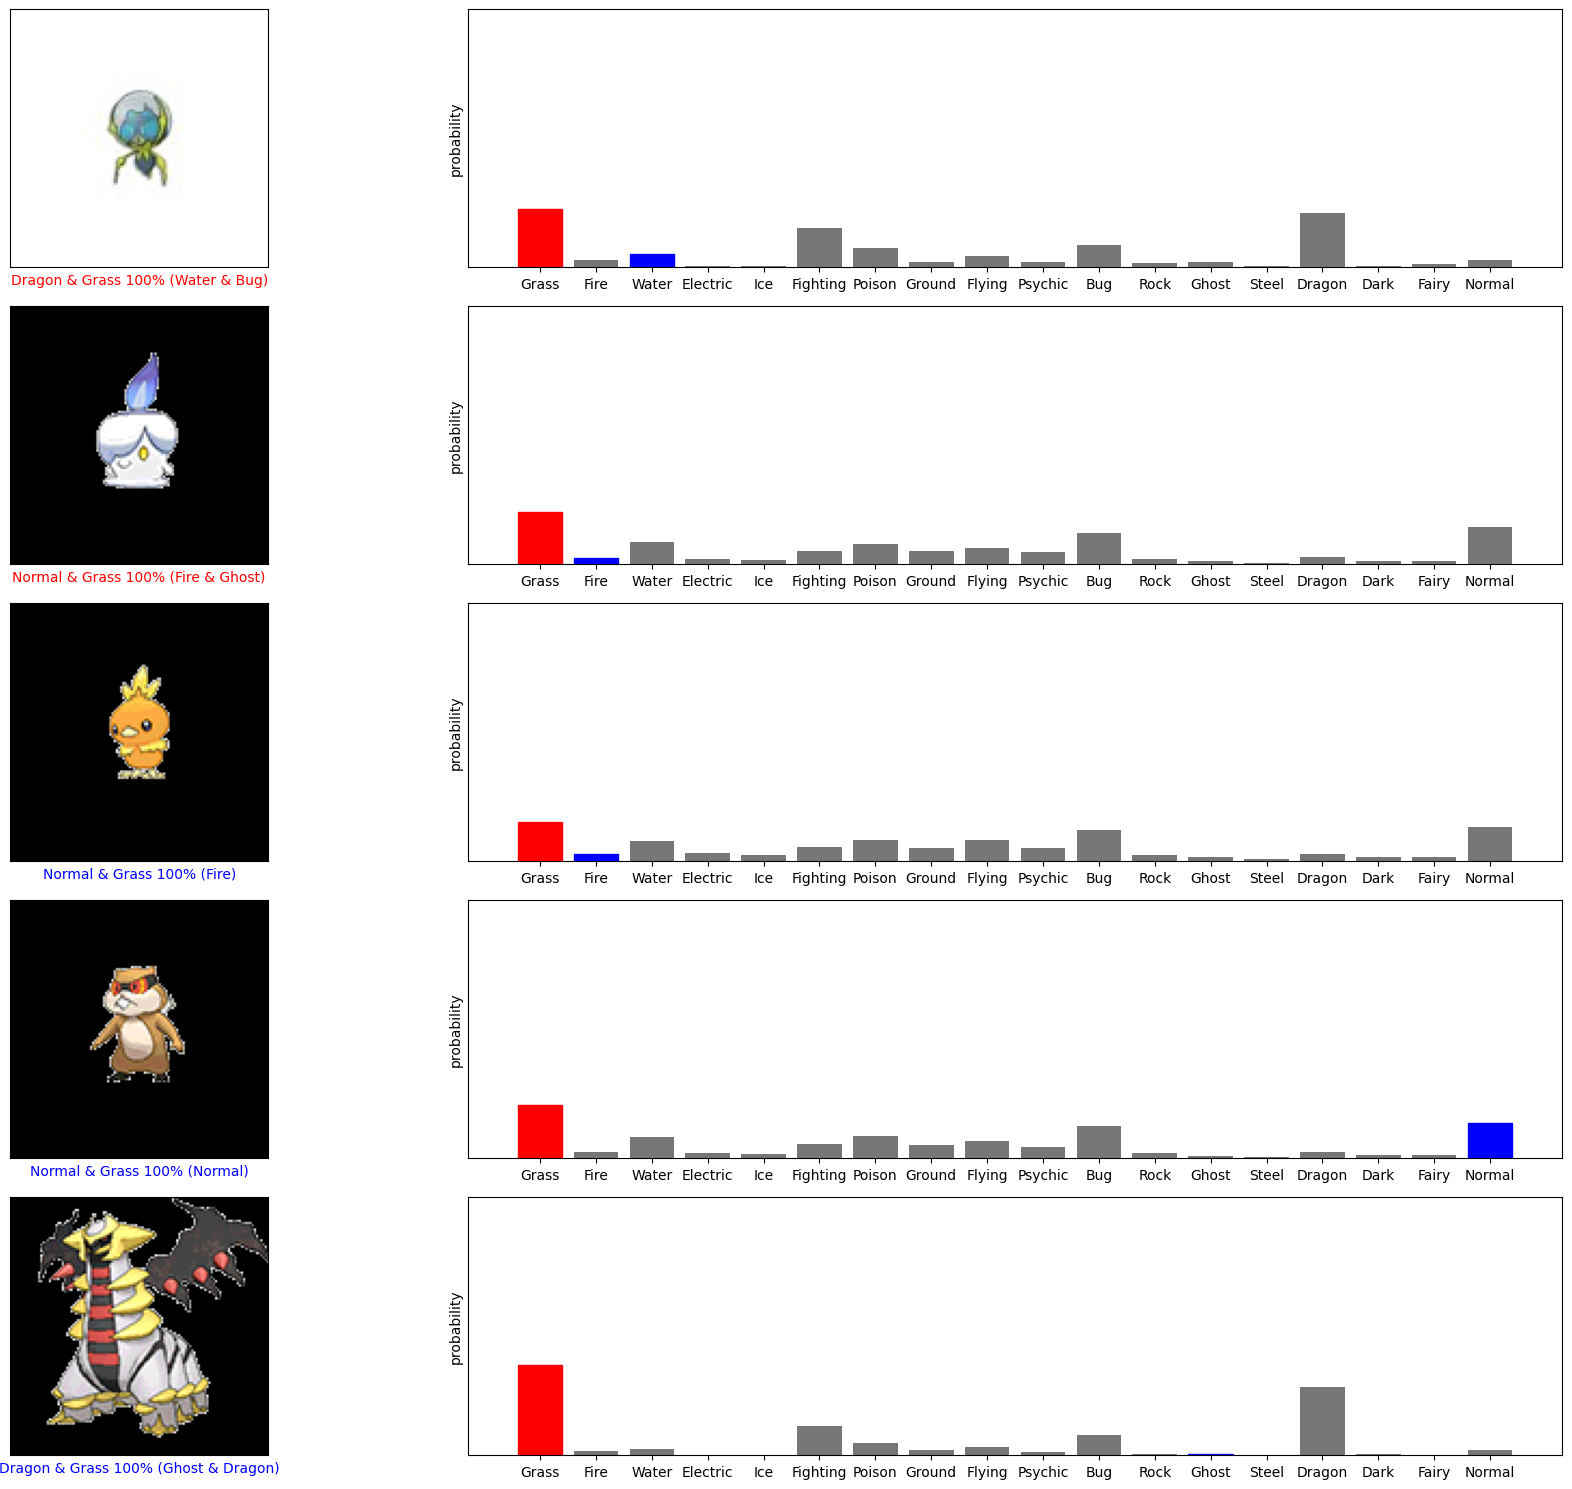

In [143]:
import matplotlib.pyplot as plt
import copy





def plot_image(i, predictions_array, true_labelz, img):




  tfg = copy.deepcopy(predictions_array)
  true_label_array = true_labelz




  true_label_array, img = true_label_array[i], img[i]




  plt.grid(False)




  plt.xticks([])




  plt.yticks([])





  plt.imshow(img, cmap=plt.cm.binary)

  # predictions_array gets modified below here
  # get both predicted labels
  predicted_label_save = tfg
  predicted_label = np.argmax(tfg)
  predicted_label_save[predicted_label] = 0
  predicted_label_2 = np.argmax(predicted_label_save)
  predicted_label_save[predicted_label] = 1
  # predictions_array gets modified up here

  # get both true labels
  true_label_save = true_label_array
  true_label = np.argmax(true_label_array)
  true_label_save[true_label] = 0
  contains_one = np.any(true_label_save == 1)
  kk = ""
  if contains_one:
    true_label_2 = np.argmax(true_label_save)
    kk = " & " + types[true_label_2]
  else:
    true_label_2 = 0
  true_label_save[true_label] = 1
    # do rest
  if predicted_label == true_label or predicted_label == true_label_2 or predicted_label_2 == true_label or predicted_label_2 == true_label_2:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} & {} {:2.0f}% ({}{})".format(types[predicted_label_2], types[predicted_label],
                                              100*np.max(tfg),
                                      types[true_label], kk),
            color=color)
  
  






def plot_value_array2(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(18))
  plt.yticks([])
  thisplot = plt.bar(types, predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)





  thisplot[predicted_label].set_color('red')




  true_label = np.argmax(true_label)




  thisplot[true_label].set_color('blue')




  ax = plt.gca()




  ax.set_ylabel('probability')







predictions = model.predict(X_test)




print(predictions[0])





# Plot the first X test images, their predicted labels, and the true labels.




# Color correct predictions in blue and incorrect predictions in red.




num_rows = 5  # 5




num_cols = 1  # 3




num_images = num_rows*num_cols




plt.figure(figsize=(5*4*num_cols, 3*num_rows))




for i in range(num_images):




  plt.subplot(num_rows, 2*num_cols, 2*i+1)




  plot_image(i, predictions[i], y_test, X_test)




  plt.subplot(num_rows, 2*num_cols, 2*i+2)




  plot_value_array2(i, predictions[i], y_test)





plt.tight_layout()




plt.show()

My model makes pretty logical guesses. we went over the pokemons with a friend who doesn't know pokemon and often they got the same guess which is pretty impressive. so even though the accuracy is so low, its not terrible. 

to improve the model it would be a fun challenge to give both the primary type and the secundary type

it always guesses the first type like this. i also tried adding a type called `None` but again you saw the model guessing lots of pokemon None. so its an interesting problem i do not know how to fix